In [34]:
# Libraries

import logging, sys
import os
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

from sklearn.linear_model import LinearRegression

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

f = open('/dev/null', 'w')
sys.stderr = f

In [35]:
# Dataset

df = pd.read_csv('RELIANCE.csv')

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

         Date    Symbol Series  Prev Close    Open    High     Low    Last  \
0  2000-01-03  RELIANCE     EQ      233.05  237.50  251.70  237.50  251.70   
1  2000-01-04  RELIANCE     EQ      251.70  258.40  271.85  251.30  271.85   
2  2000-01-05  RELIANCE     EQ      271.85  256.65  287.90  256.65  286.75   
3  2000-01-06  RELIANCE     EQ      282.50  289.00  300.70  289.00  293.50   
4  2000-01-07  RELIANCE     EQ      294.35  295.00  317.90  293.00  314.50   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  251.70  249.37   4456424  1.111319e+14     NaN                 NaN   
1  271.85  263.52   9487878  2.500222e+14     NaN                 NaN   
2  282.50  274.79  26833684  7.373697e+14     NaN                 NaN   
3  294.35  295.45  15682286  4.633254e+14     NaN                 NaN   
4  314.55  308.91  19870977  6.138388e+14     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4      

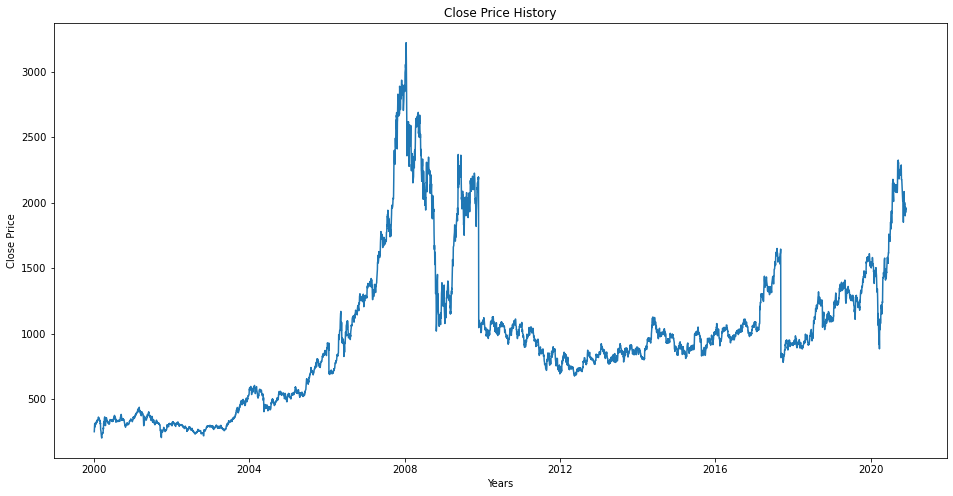

In [36]:
# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

# plot

plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.xlabel("Years")
plt.ylabel("Close Price")
plt.plot(df['Close'], label='Close Price history')
plt.show()

In [37]:
# Creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [38]:
# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of training set:
(987, 2)

 Shape of validation set:
(4217, 2)


In [39]:
# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.

# making predictions

preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
560929397.0585699


In [40]:
# setting index as date values

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

# sorting

data = df.sort_index(ascending=True, axis=0)

# creating a separate dataset

new_data = pd.DataFrame(index=range(0,len(df)),columns=['Open', 'Close'])

for i in range(0,len(data)):
    new_data['Open'][i] = data['Open'][i]
    new_data['Close'][i] = data['Close'][i]

In [41]:
# split into train and validation

train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [42]:
# implement linear regression

model = LinearRegression()
model.fit(x_train,y_train)

# make predictions and find the rmse

preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

31.350884547569617

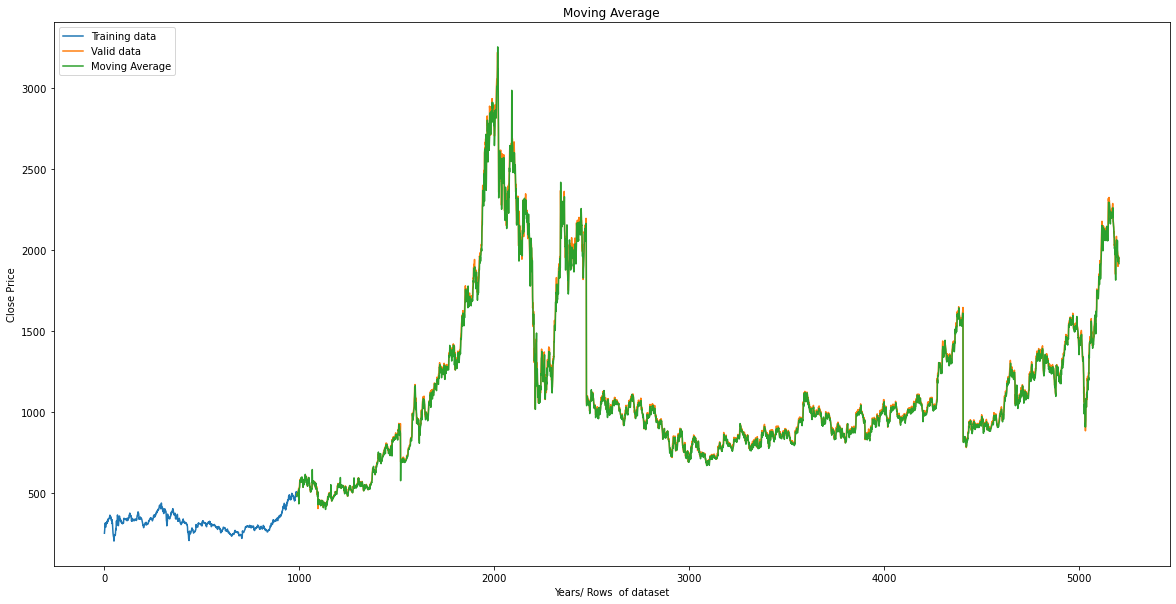

In [43]:
# Plot Moving Average

valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.title("Moving Average")
plt.xlabel("Years/ Rows  of dataset")
plt.ylabel("Close Price")
plt.legend(labels = ('Training data','Valid data','Moving Average'),loc='upper left')
plt.show()

In [44]:
# importing libraries

from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [45]:
# scaling data

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [46]:
# using gridsearch to find the best parameter

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [47]:
# fit the model and make predictions

model.fit(x_train,y_train)
preds = model.predict(x_valid)

# rmse

rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

975.481508004976

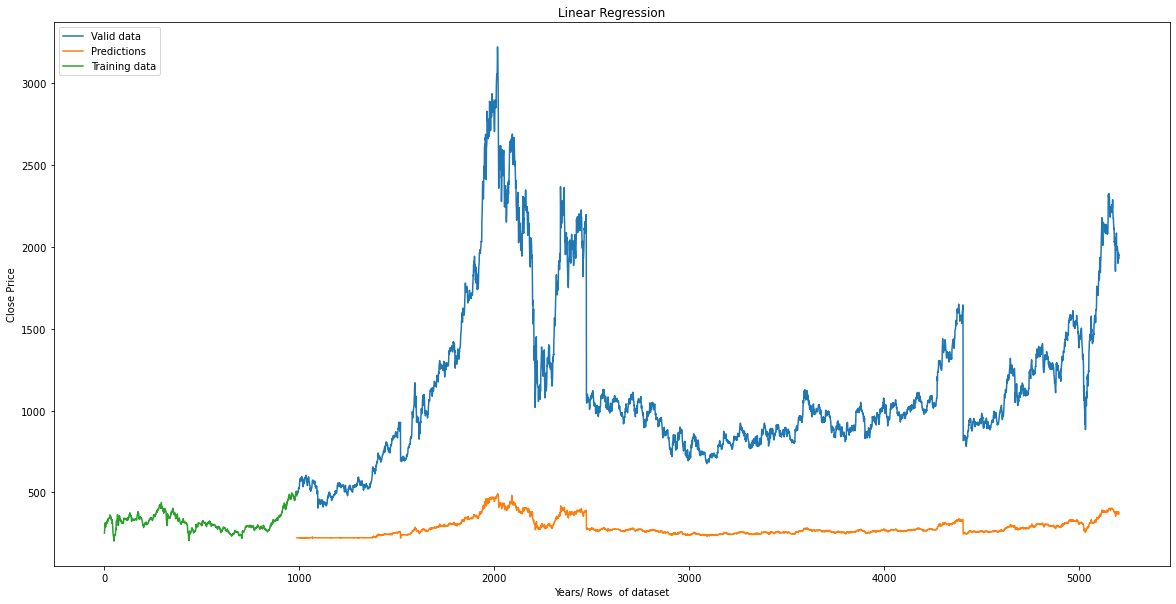

In [48]:
# plot Linear Regression

valid['Predictions'] = 0
valid['Predictions'] = preds
plt.title("Linear Regression")
plt.xlabel("Years/ Rows  of dataset")
plt.ylabel("Close Price")
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])
plt.legend(labels = ('Valid data','Predictions','Training data'),loc='upper left')
plt.show()

In [49]:
# importing required libraries

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# creating dataframe

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [50]:
# setting index

new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

# creating train and test sets

dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

# converting dataset into x_train and y_train

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [51]:
# create and fit the LSTM network

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

# predicting 246 values, using past 60 from the train data

inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

927/927 - 35s - loss: 7.0543e-05


67.78029606405352

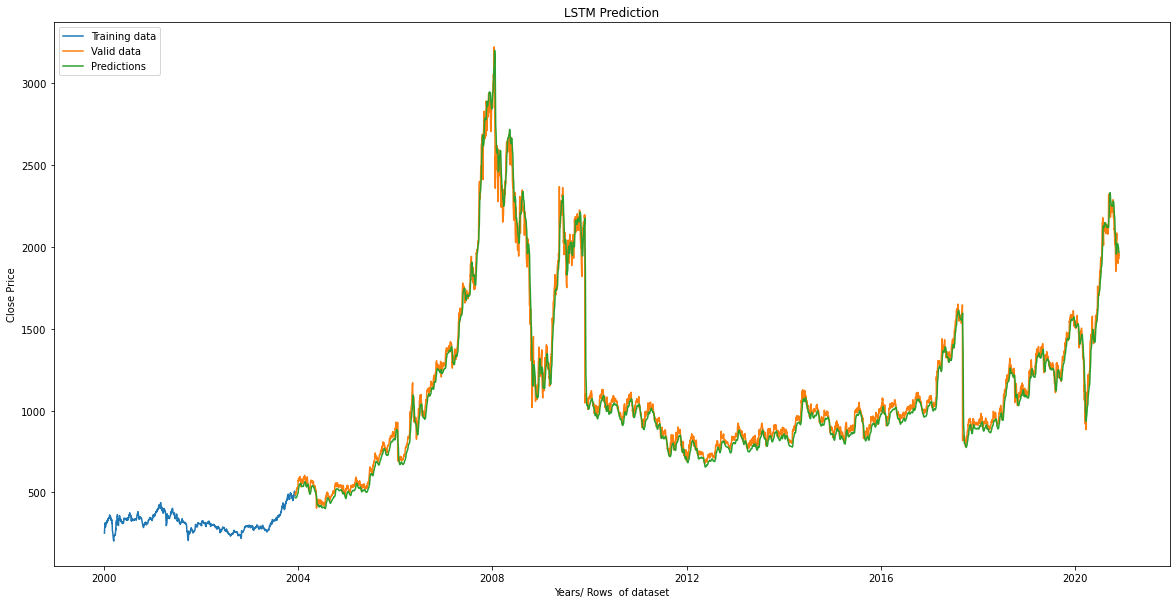

In [52]:
# plot Long short term memory

train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.title("LSTM Prediction")
plt.xlabel("Years/ Rows  of dataset")
plt.ylabel("Close Price")
plt.legend(labels = ('Training data','Valid data','Predictions'),loc='upper left')
plt.show()